In [6]:
import cv2
import matplotlib.pyplot as plt
from skimage.transform import resize
from matplotlib.pyplot import imshow

# Extract the Video Data

In [4]:
# using video capture to load the video
vcap=cv2.VideoCapture('./v_ApplyLipstick.avi')
success=True
# sampling 1 frame per 10 frames
each_nth=10
# store the frames (video data we will be using)
frame = []
cnt=0
while success:
    try:
        success,image=vcap.read()
        cnt+=1
        if cnt%each_nth==0:
            # standardizing the size of the image
            image=resize(image,(128,192))
            frame.append(image)
    except Exception as e:
        print(e)

'NoneType' object has no attribute 'shape'


# Data Processing

In [17]:
# applying gaussian blur to each of the ten frames
frame_blur=[]
for image in frame:
    image_8bit = (image * 255).astype('uint8')
    image_gray=cv2.cvtColor(image_8bit,cv2.COLOR_RGB2GRAY)
    image_blur=cv2.GaussianBlur(image_gray,(5,5),0)
    frame_blur.append(image_blur)

In [18]:
# applying canny on the blurred frames to create edges
frame_canny=[]
for image in frame_blur:
    image_canny=cv2.Canny(image,threshold1=30, threshold2=100)
    frame_canny.append(image_canny)

# Exploratory Data Analysis

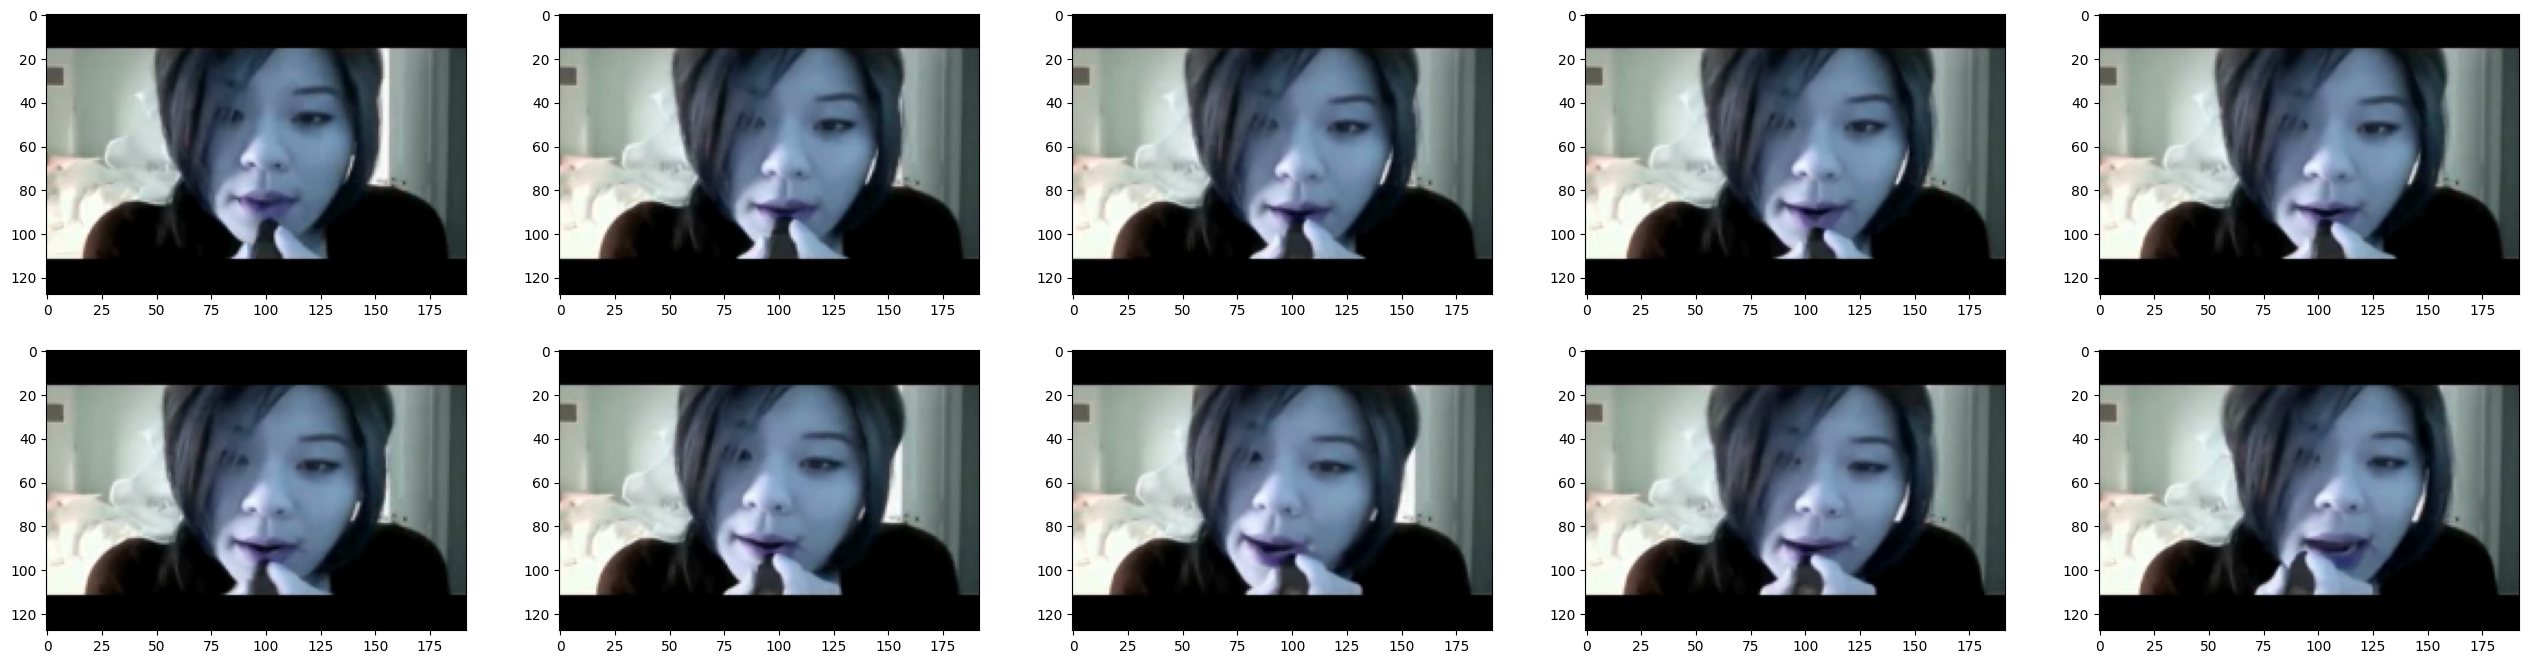

In [10]:
# visualizing the first 10 frames
fig = plt.figure(figsize=(32,8))

for i,image in enumerate(frame):
    if i < 10:
        ax = plt.subplot(2,5,i+1)
        imshow(image)

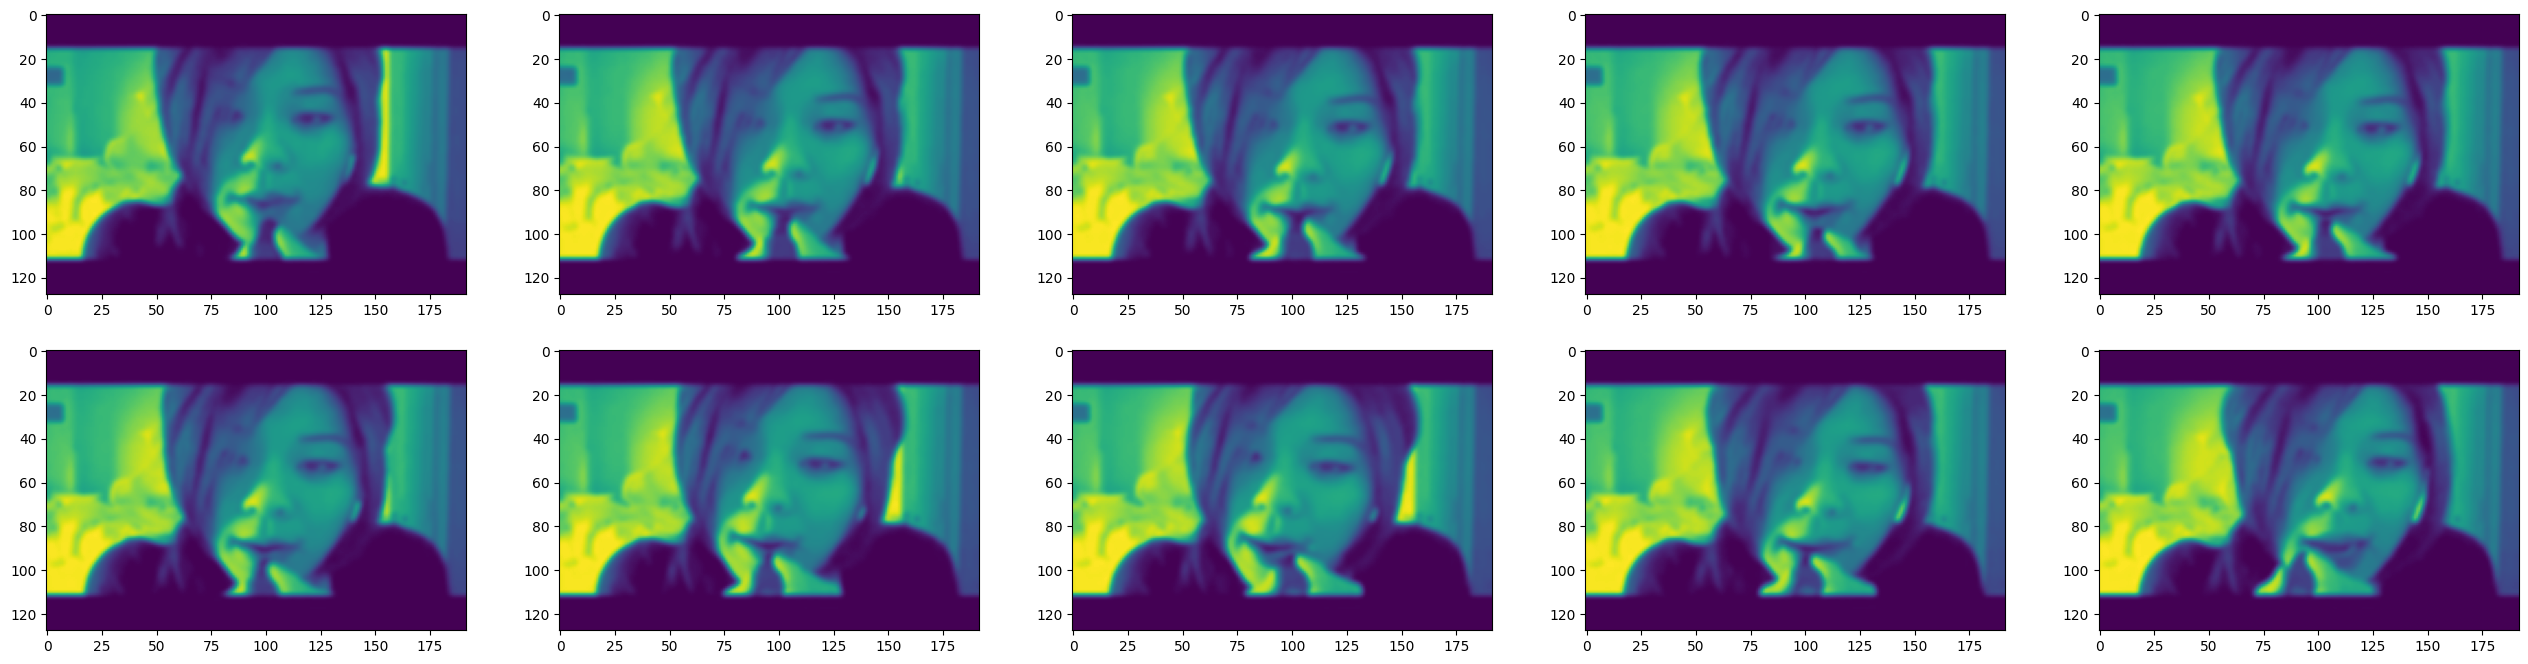

In [19]:
# visualizing the blurred grayscale frames
fig = plt.figure(figsize=(32,8))

for i,image in enumerate(frame_blur):
    if i < 10:
        ax = plt.subplot(2,5,i+1)
        imshow(image)

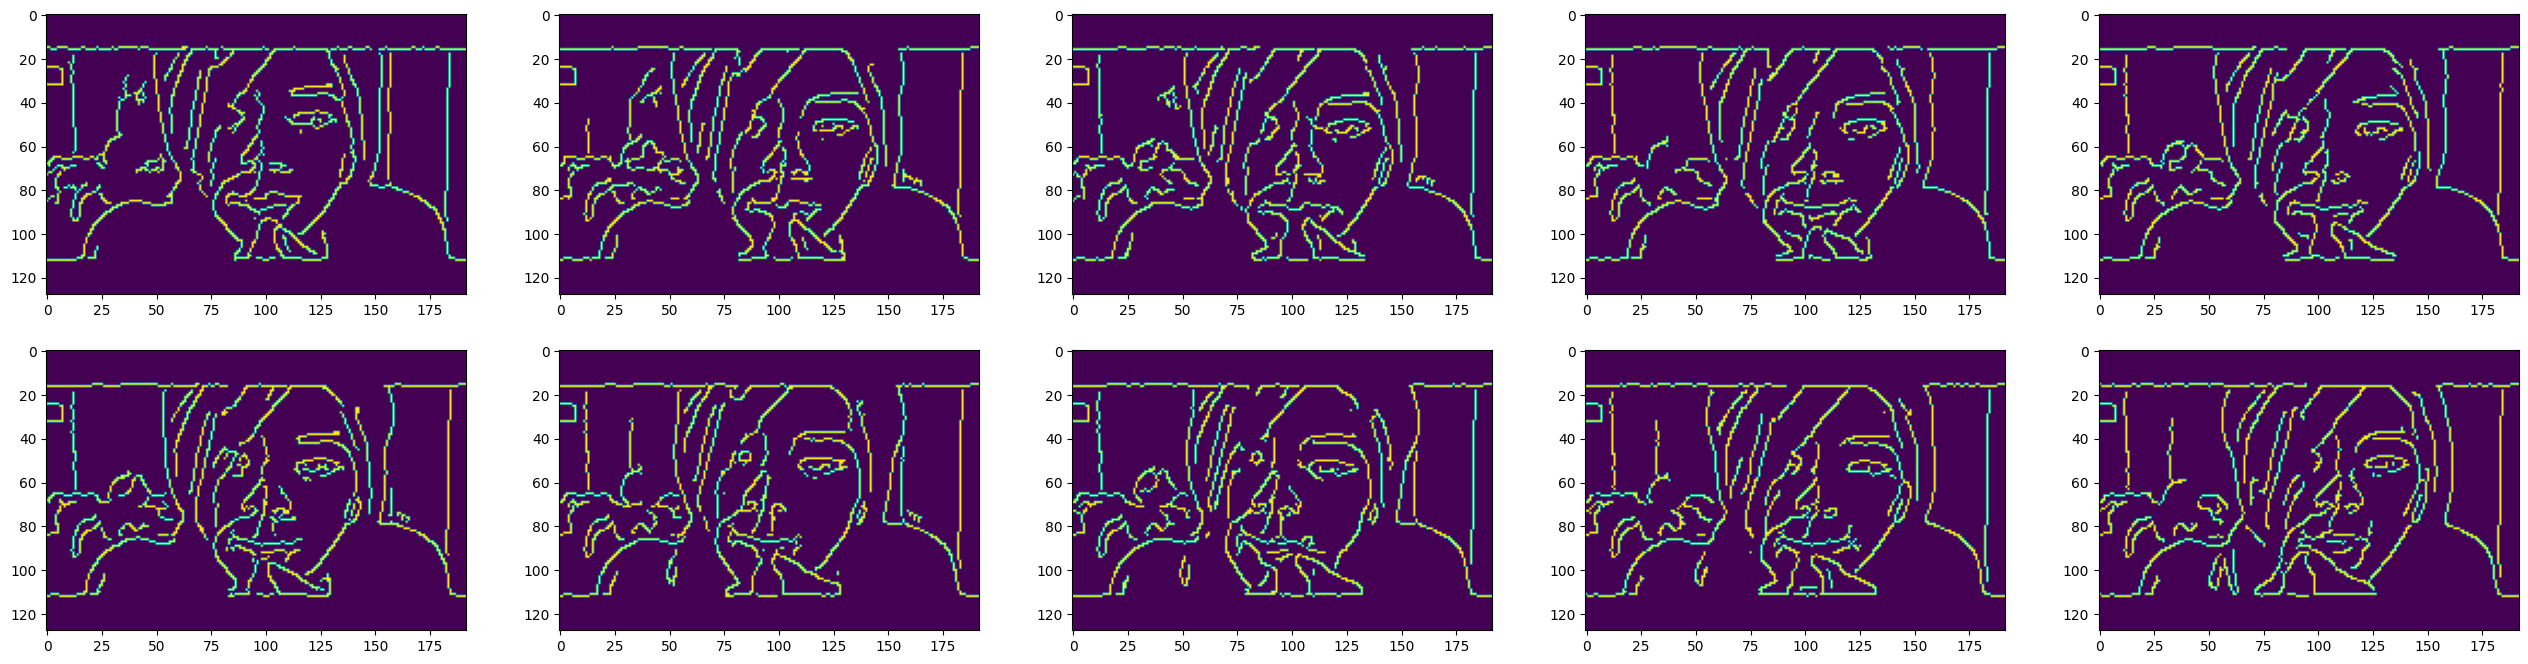

In [20]:
# visualizing the canny frames (edge detection)
fig = plt.figure(figsize=(32,8))

for i,image in enumerate(frame_canny):
    if i < 10:
        ax = plt.subplot(2,5,i+1)
        imshow(image)